# Saving Experiment Data to the Cloud

Qiskit Experiments is designed to work with Qiskit's [online experiment database](https://quantum-computing.ibm.com/experiments), where you can view and share results of experiments you've run. This tutorial shows how to save your experimental results to the database. You will need to have `qiskit-ibmq-provider` installed locally and an account in the Qiskit cloud service. We will use the `ibmq_armonk` backend which is open and available to everyone.

In [1]:
from qiskit import IBMQ

IBMQ.load_account()
provider = IBMQ.get_provider(hub="ibm-q", group="open", project="main")
backend = provider.get_backend("ibmq_armonk")

## $T_1$ Experiment

Let's run a $T_1$ experiment and save the results to the experiment database.

In [2]:
from qiskit_experiments.library.characterization import T1
import numpy as np

t1_delays = np.arange(1e-6, 600e-6, 50e-6)

# Create an experiment for qubit 0,
# with the specified time intervals in seconds
exp = T1(qubit=0, delays=t1_delays)
print(exp.circuits()[0])

     ┌───┐ ░ ┌─────────────────┐ ░ ┌─┐
  q: ┤ X ├─░─┤ Delay(1e-06[s]) ├─░─┤M├
     └───┘ ░ └─────────────────┘ ░ └╥┘
c: 1/═══════════════════════════════╩═
                                    0 


Now we run the experiment. `block_for_results()` blocks execution until the experiment is complete, then `save()` is called to save the data to ResultsDB.

In [3]:
# Run the experiment circuits with 1000 shots each,
# and analyze the result

t1_expdata = exp.run(backend=backend, shots=1000).block_for_results()
t1_expdata.save()

You can view the experiment online at https://quantum-computing.ibm.com/experiments/d4539703-1f55-4aa5-befe-d8e8e5f274a3


Note that calling `save()` before the experiment is complete will instantiate an experiment entry in the database, but it will not have complete data. To fix this, you can call `save()` again once the experiment is done running.

Our $T_1$ figure and analysis results:

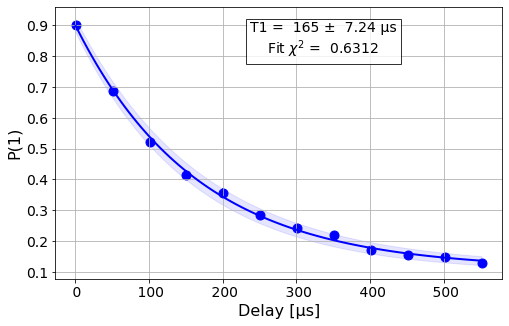

DbAnalysisResultV1
- name: @Parameters_T1Analysis
- value: [7.94606369e-01 1.08432993e-01 1.64684523e-04] ± [1.15917392e-02 9.80484687e-03 7.24146088e-06]
- χ²: 0.6312147837244724
- quality: bad
- extra: <4 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: T1
- value: 0.00016468452295042568 ± 7.241460875012179e-06 s
- χ²: 0.6312147837244724
- quality: bad
- device_components: ['Q0']
- verified: False


In [4]:
display(t1_expdata.figure(0))
for result in t1_expdata.analysis_results():
    print(result)

You can also view the results at the [IBM Quantum Experiments pane](https://quantum-computing.ibm.com/experiments?date_interval=last-90-days&owner=me) on the cloud.

By default, the interface displays all experiments you have privilege to see, but this link shows your own experiments. You can change that setting by clicking on the All Experiments dropdown. You can also filter by device, date, provider, and result by clicking on the filter icon.

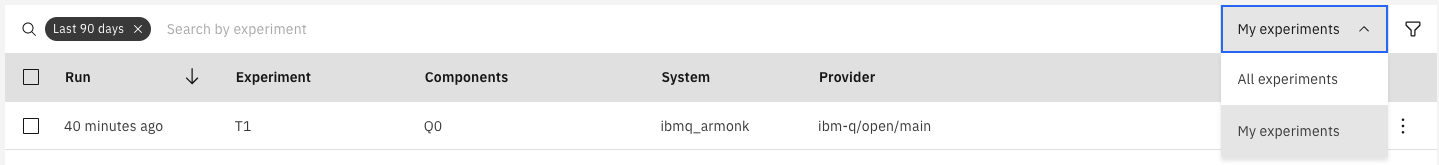

Individual experiment pages show the plot, and one or more important analysis results, which for the $T_1$ experiment is the fitted $T_1$ value.

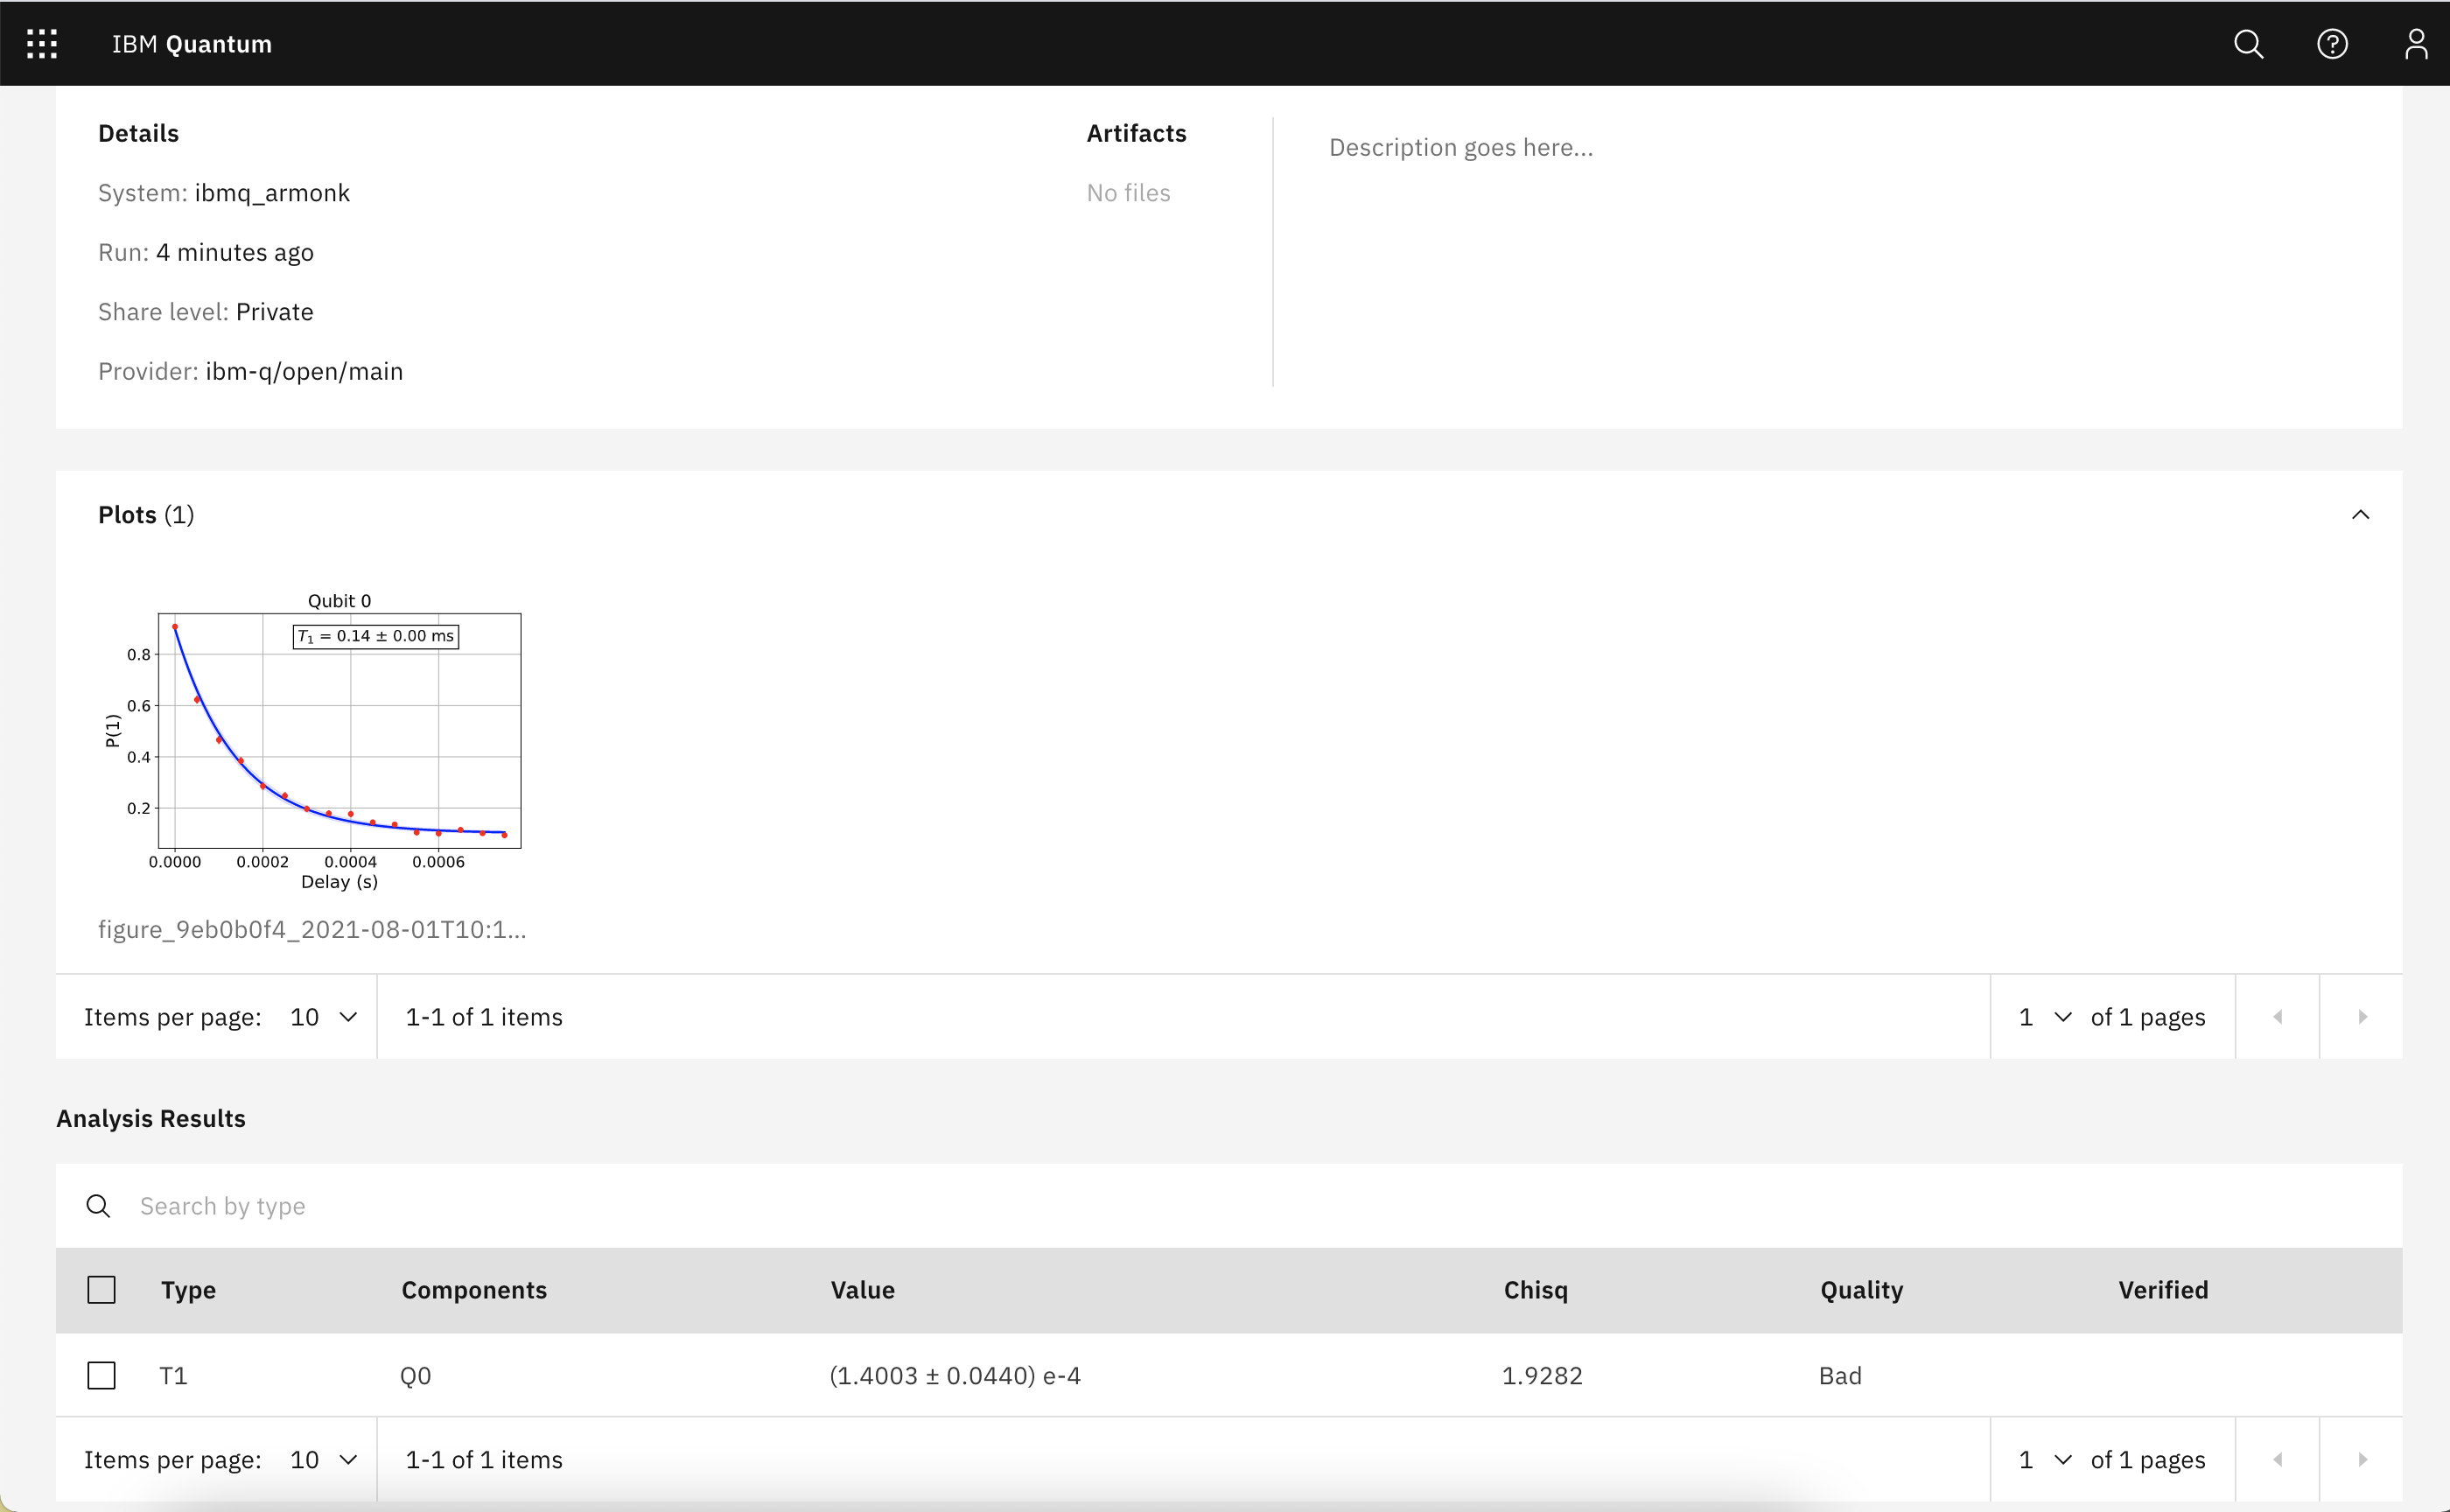

You can change the quality and verify/unverify the results upon selection of an analysis result. Quality is an automatic parameter generated by the experiment analysis based on pre-set criteria; in this case the $T_1$ fit is considered bad because the amplitude parameter is not close enough to 1. The verification field is for a human to determine whether the result is acceptable.

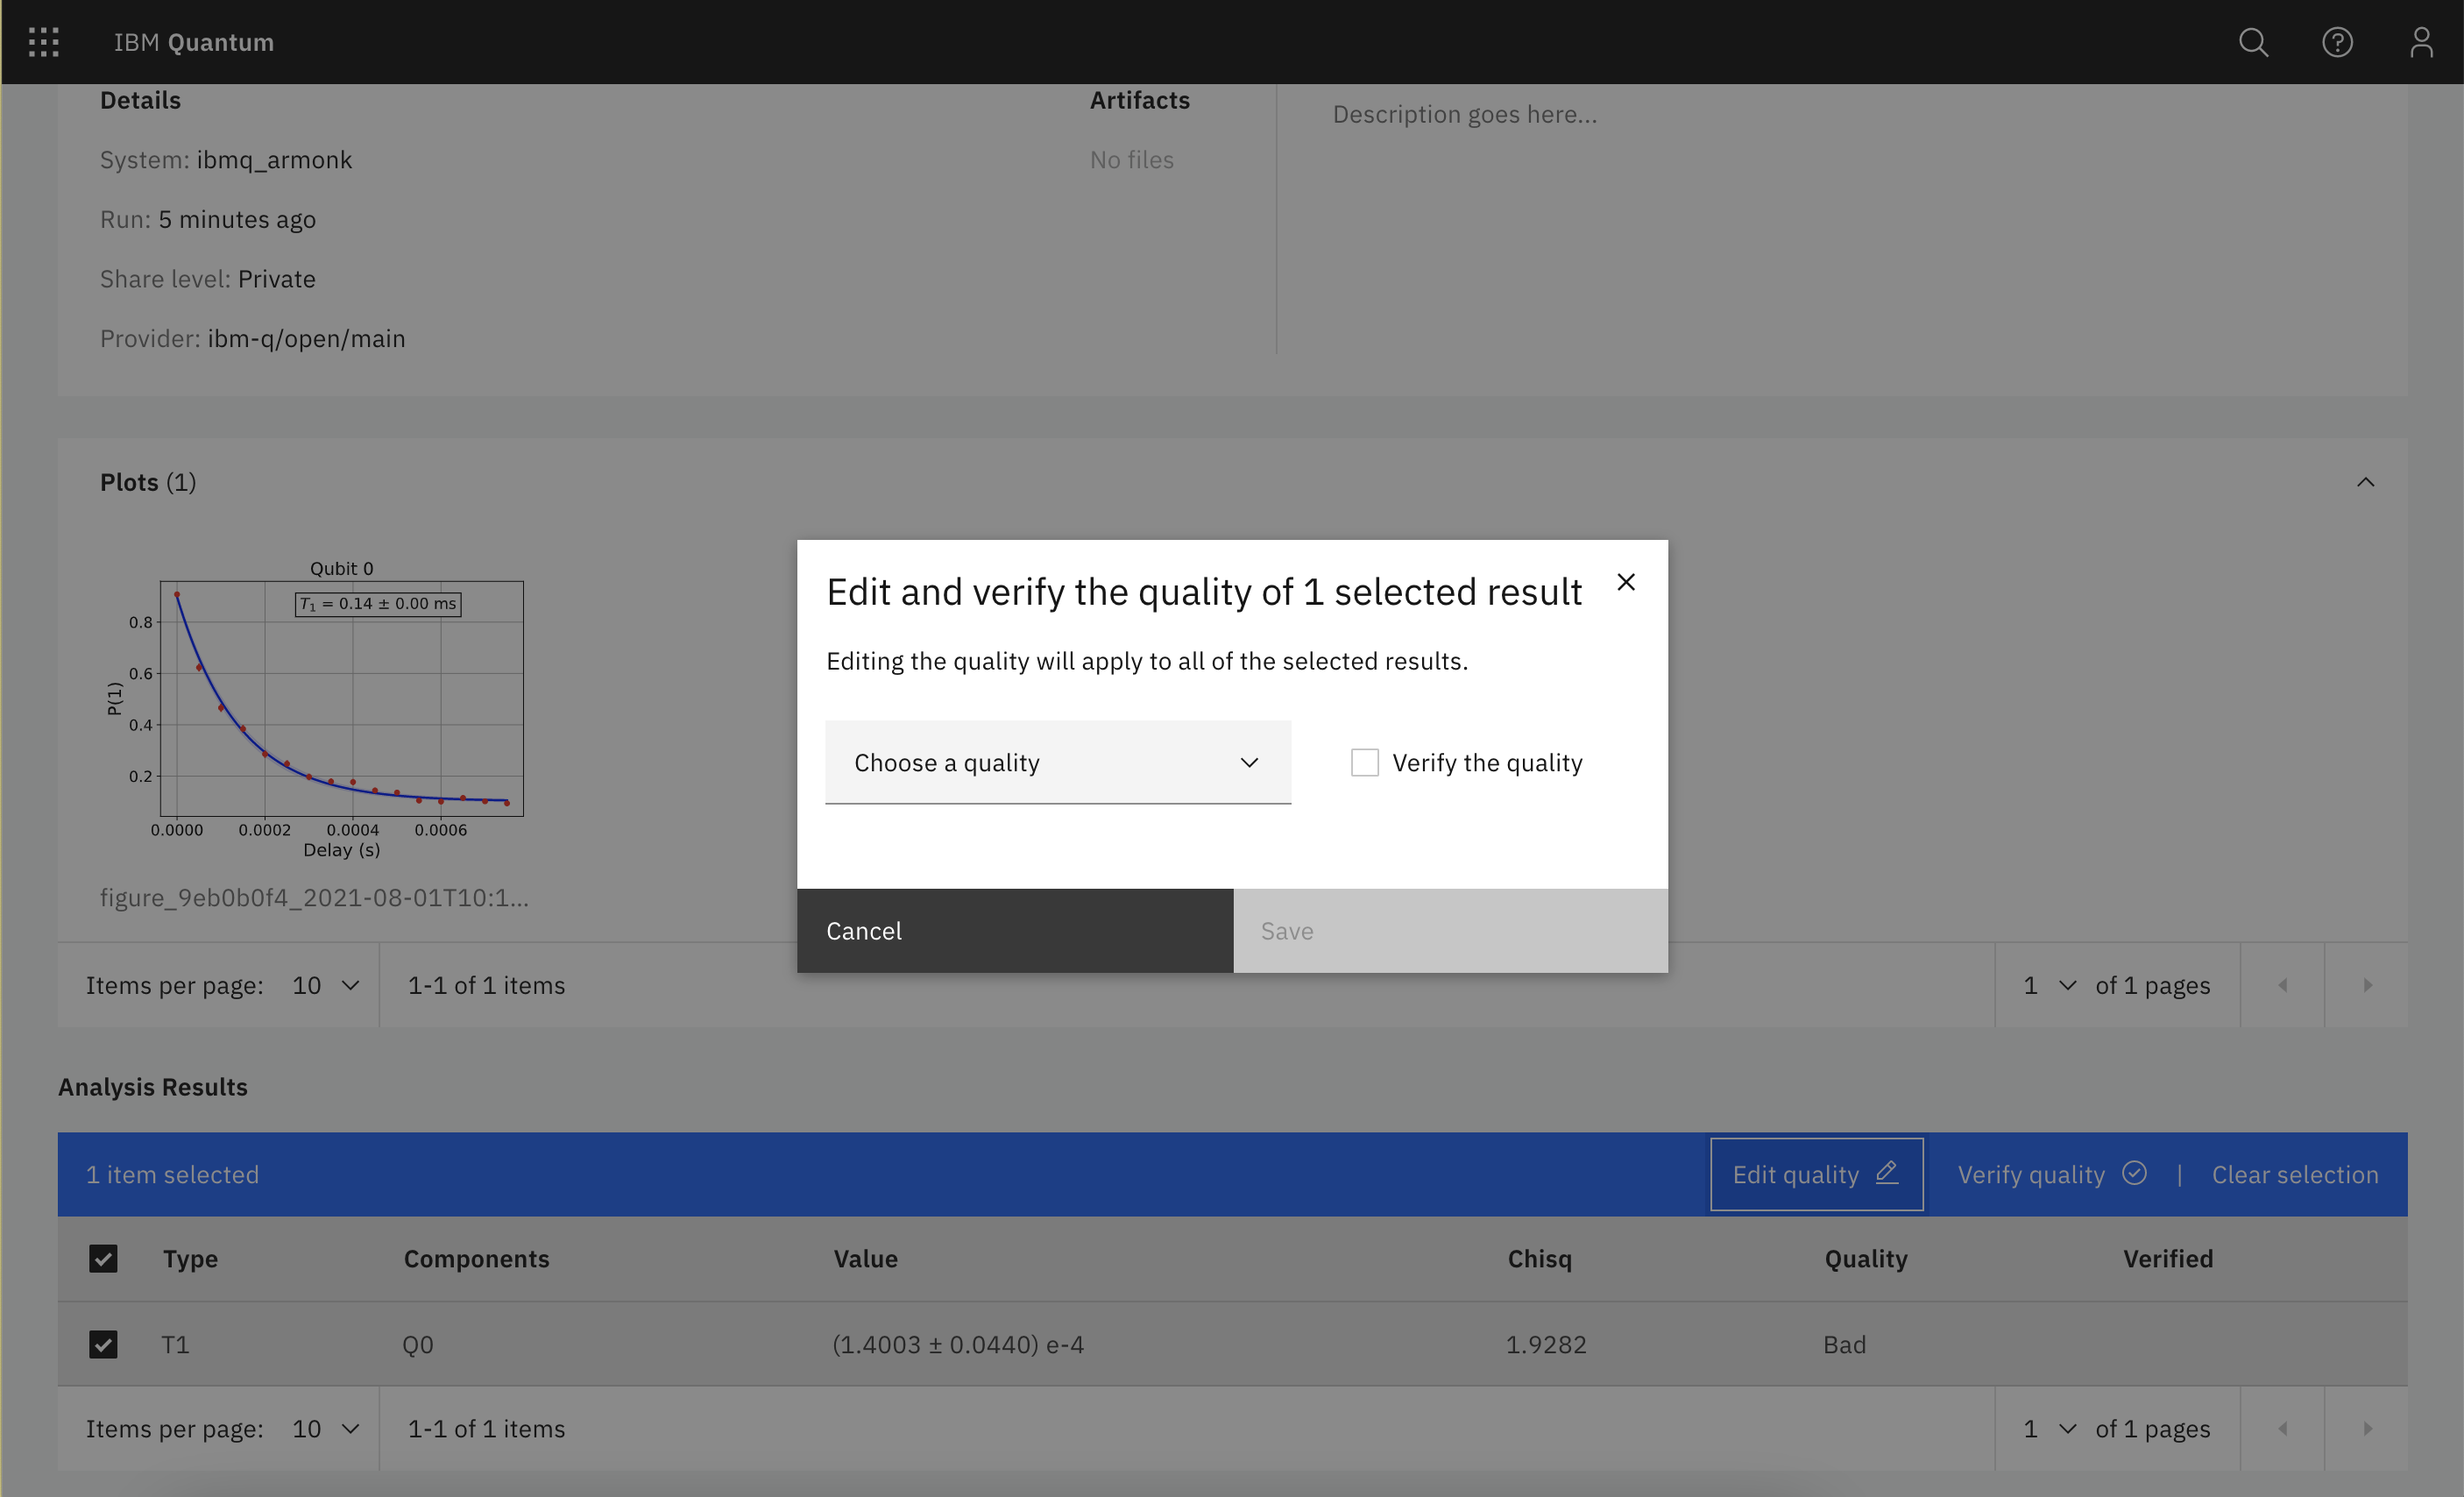

### Loading an experiment from the database

You can also load the full saved experiment from the database service. Let's load a [previous T1 experiment](https://quantum-computing.ibm.com/experiments/9eb0b0f4-be97-4c57-9665-8c9ff09442e8), which we've made public by editing the `Share level` field:

In [5]:
from qiskit_experiments.database_service import DbExperimentDataV1 as DbExperimentData

load_exp = DbExperimentData.load("d4539703-1f55-4aa5-befe-d8e8e5f274a3", provider.service("experiment"))

To display the figure, which is serialized into a string, we need the SVG library:

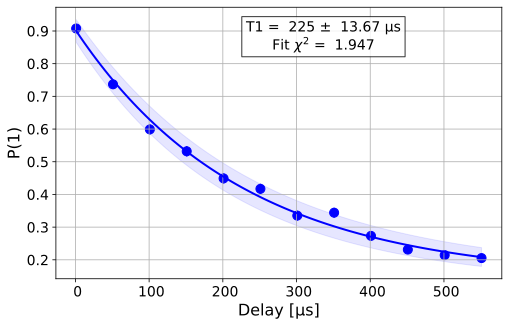

In [6]:
from IPython.display import SVG
SVG(load_exp.figure(0))

We've also retrieved the full analysis results from the database:

In [7]:
for result in load_exp.analysis_results():
    print(result)

DbAnalysisResultV1
- name: T1
- value: 0.00014003438826912983 ± 4.398101339932208e-06 s
- χ²: 1.9282291758563228
- quality: ResultQuality.BAD
- extra: <8 items>
- device_components: ['Q0']
- verified: False


### Auto-saving an experiment

There is also the `auto_save` feature, which saves the data of an experiment preemptively. In the future, you will be able to set `provider.experiment.set_option(auto_save=True)` to turn `auto_save` on by default at the experiment service level.

In [8]:
exp = T1(qubit=0, delays=t1_delays)

t1_expdata = exp.run(backend=backend, shots=1000)
t1_expdata.auto_save = True
t1_expdata.block_for_results()

Not all post-processing has finished. Consider calling save() again after all post-processing is done to save any newly generated data.


You can view the experiment online at https://quantum-computing.ibm.com/experiments/2cbd7e7b-e347-4f17-a438-b16c6d53287f


<ExperimentData[T1], backend: ibmq_armonk, status: DONE, experiment_id: 2cbd7e7b-e347-4f17-a438-b16c6d53287f>

### Deleting an experiment

Both figures and analysis results can be deleted. Note that unless you have auto save on, the update has to be manually saved to the remote database by calling `save()`.

In [9]:
t1_expdata.delete_figure(0)
t1_expdata.delete_analysis_result(0)


Are you sure you want to delete the experiment plot? [y/N]: y

Are you sure you want to delete the analysis result? [y/N]: y


'9e81892a-f13e-468b-95fc-f829a2afce1f'

The interface shows that both the figure and analysis result have been deleted:
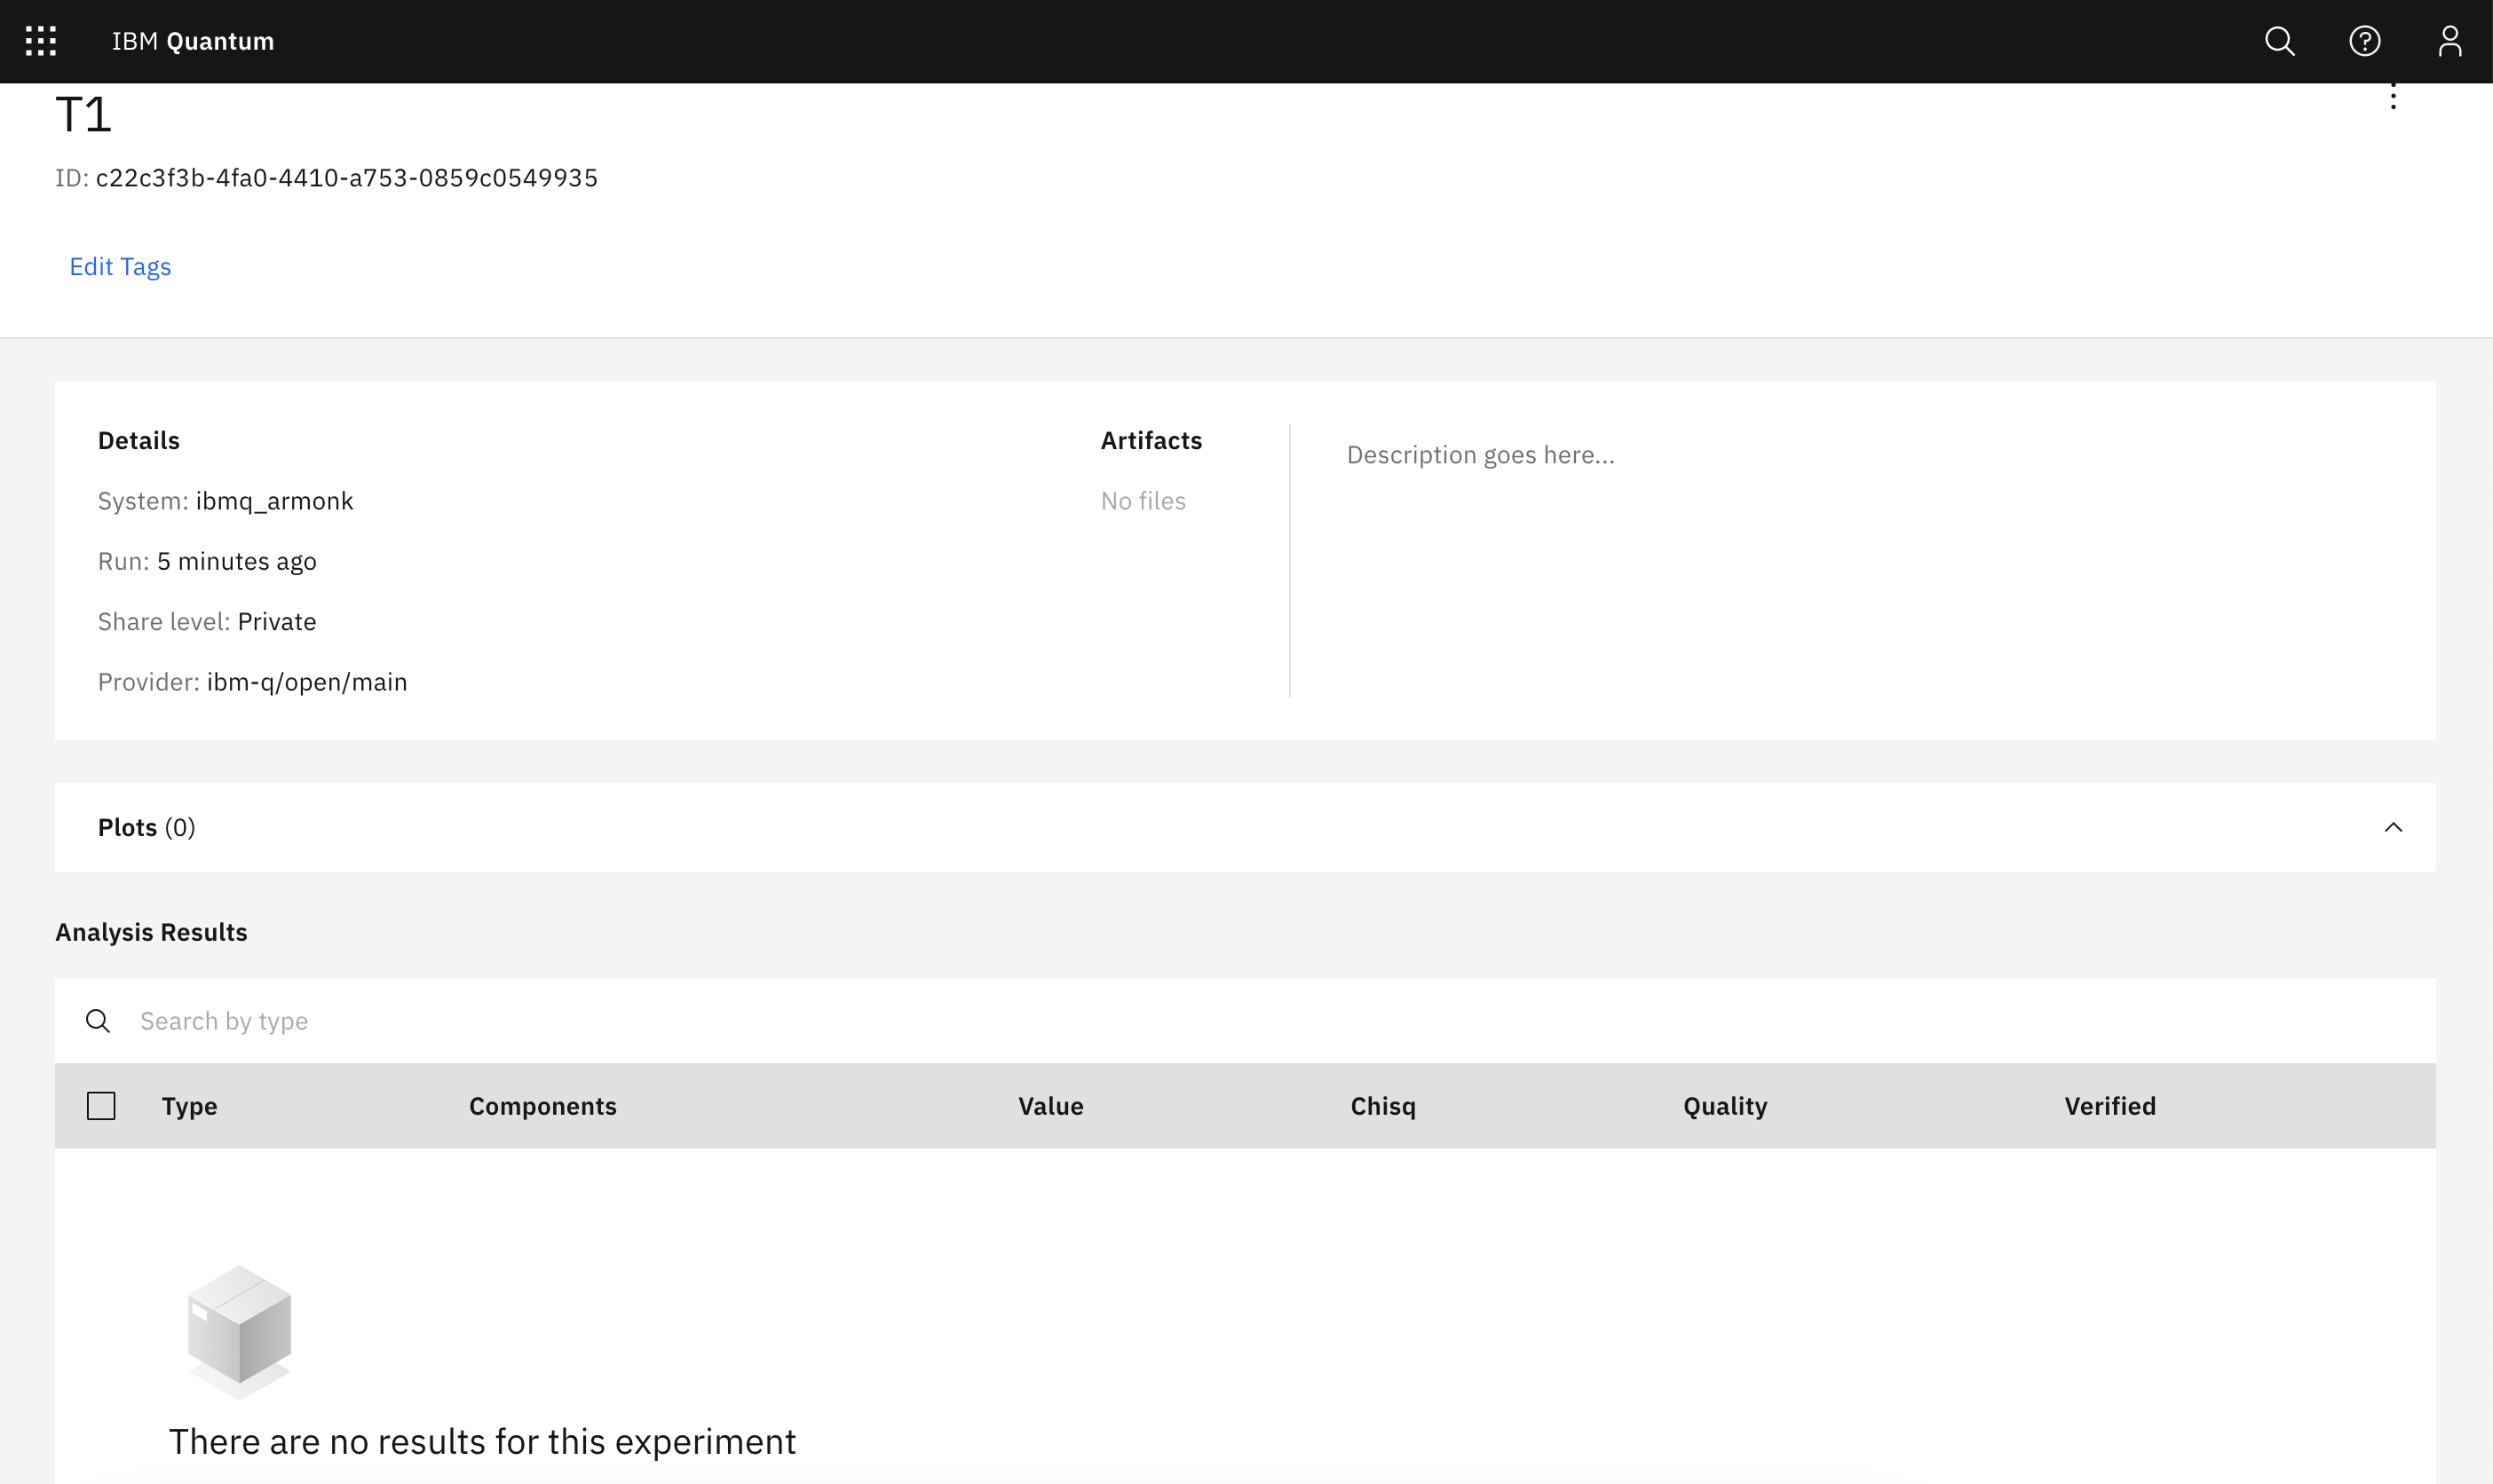

## RB experiment
Let's now do a standard RB experiment and save the results to ResultsDB.

In [10]:
from qiskit_experiments.library import randomized_benchmarking as rb

lengths = list(range(1, 1000, 200))
num_samples = 10
seed = 1010

rb_exp = rb.StandardRB([0], lengths, num_samples=num_samples, seed=seed)
rb_expdata = rb_exp.run(backend).block_for_results()
rb_expdata.save()

You can view the experiment online at https://quantum-computing.ibm.com/experiments/f7fcf941-067a-4f0e-8dfb-f7c0ae862cc8


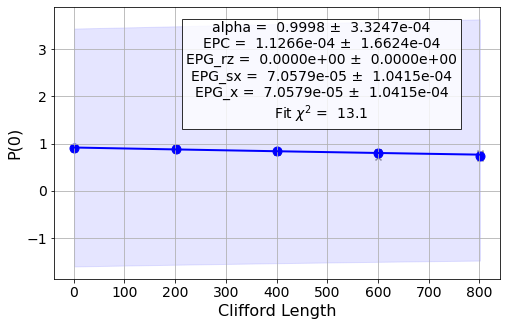

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [9.16364654e-01 9.99774688e-01 3.01828641e-19] ± [1.26073871e+00 3.32474852e-04 1.26197705e+00]
- χ²: 13.101370110046265
- extra: <4 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.9997746880536807 ± 0.00033247485242169305
- χ²: 13.101370110046265
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.0001126559731596255 ± 0.00016623742621084652
- χ²: 13.101370110046265
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPG_rz
- value: 0.0 ± 0.0
- χ²: 13.101370110046265
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPG_sx
- value: 7.057902264347598e-05 ± 0.00010414782935747094
- χ²: 13.101370110046265
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPG_x
- value: 7.057902264347598e-05 ± 0.00010414782935747094
- χ²: 13.101370110046265
- device_components: ['Q0']
- verified: F

In [11]:
display(rb_expdata.figure(0))
for result in rb_expdata.analysis_results():
    print(result)

Here is the view of the same job on the database service. Note that `EPG` and `RBAnalysis` are lists of values, and so are not shown on the user interface unlike the single value fields:

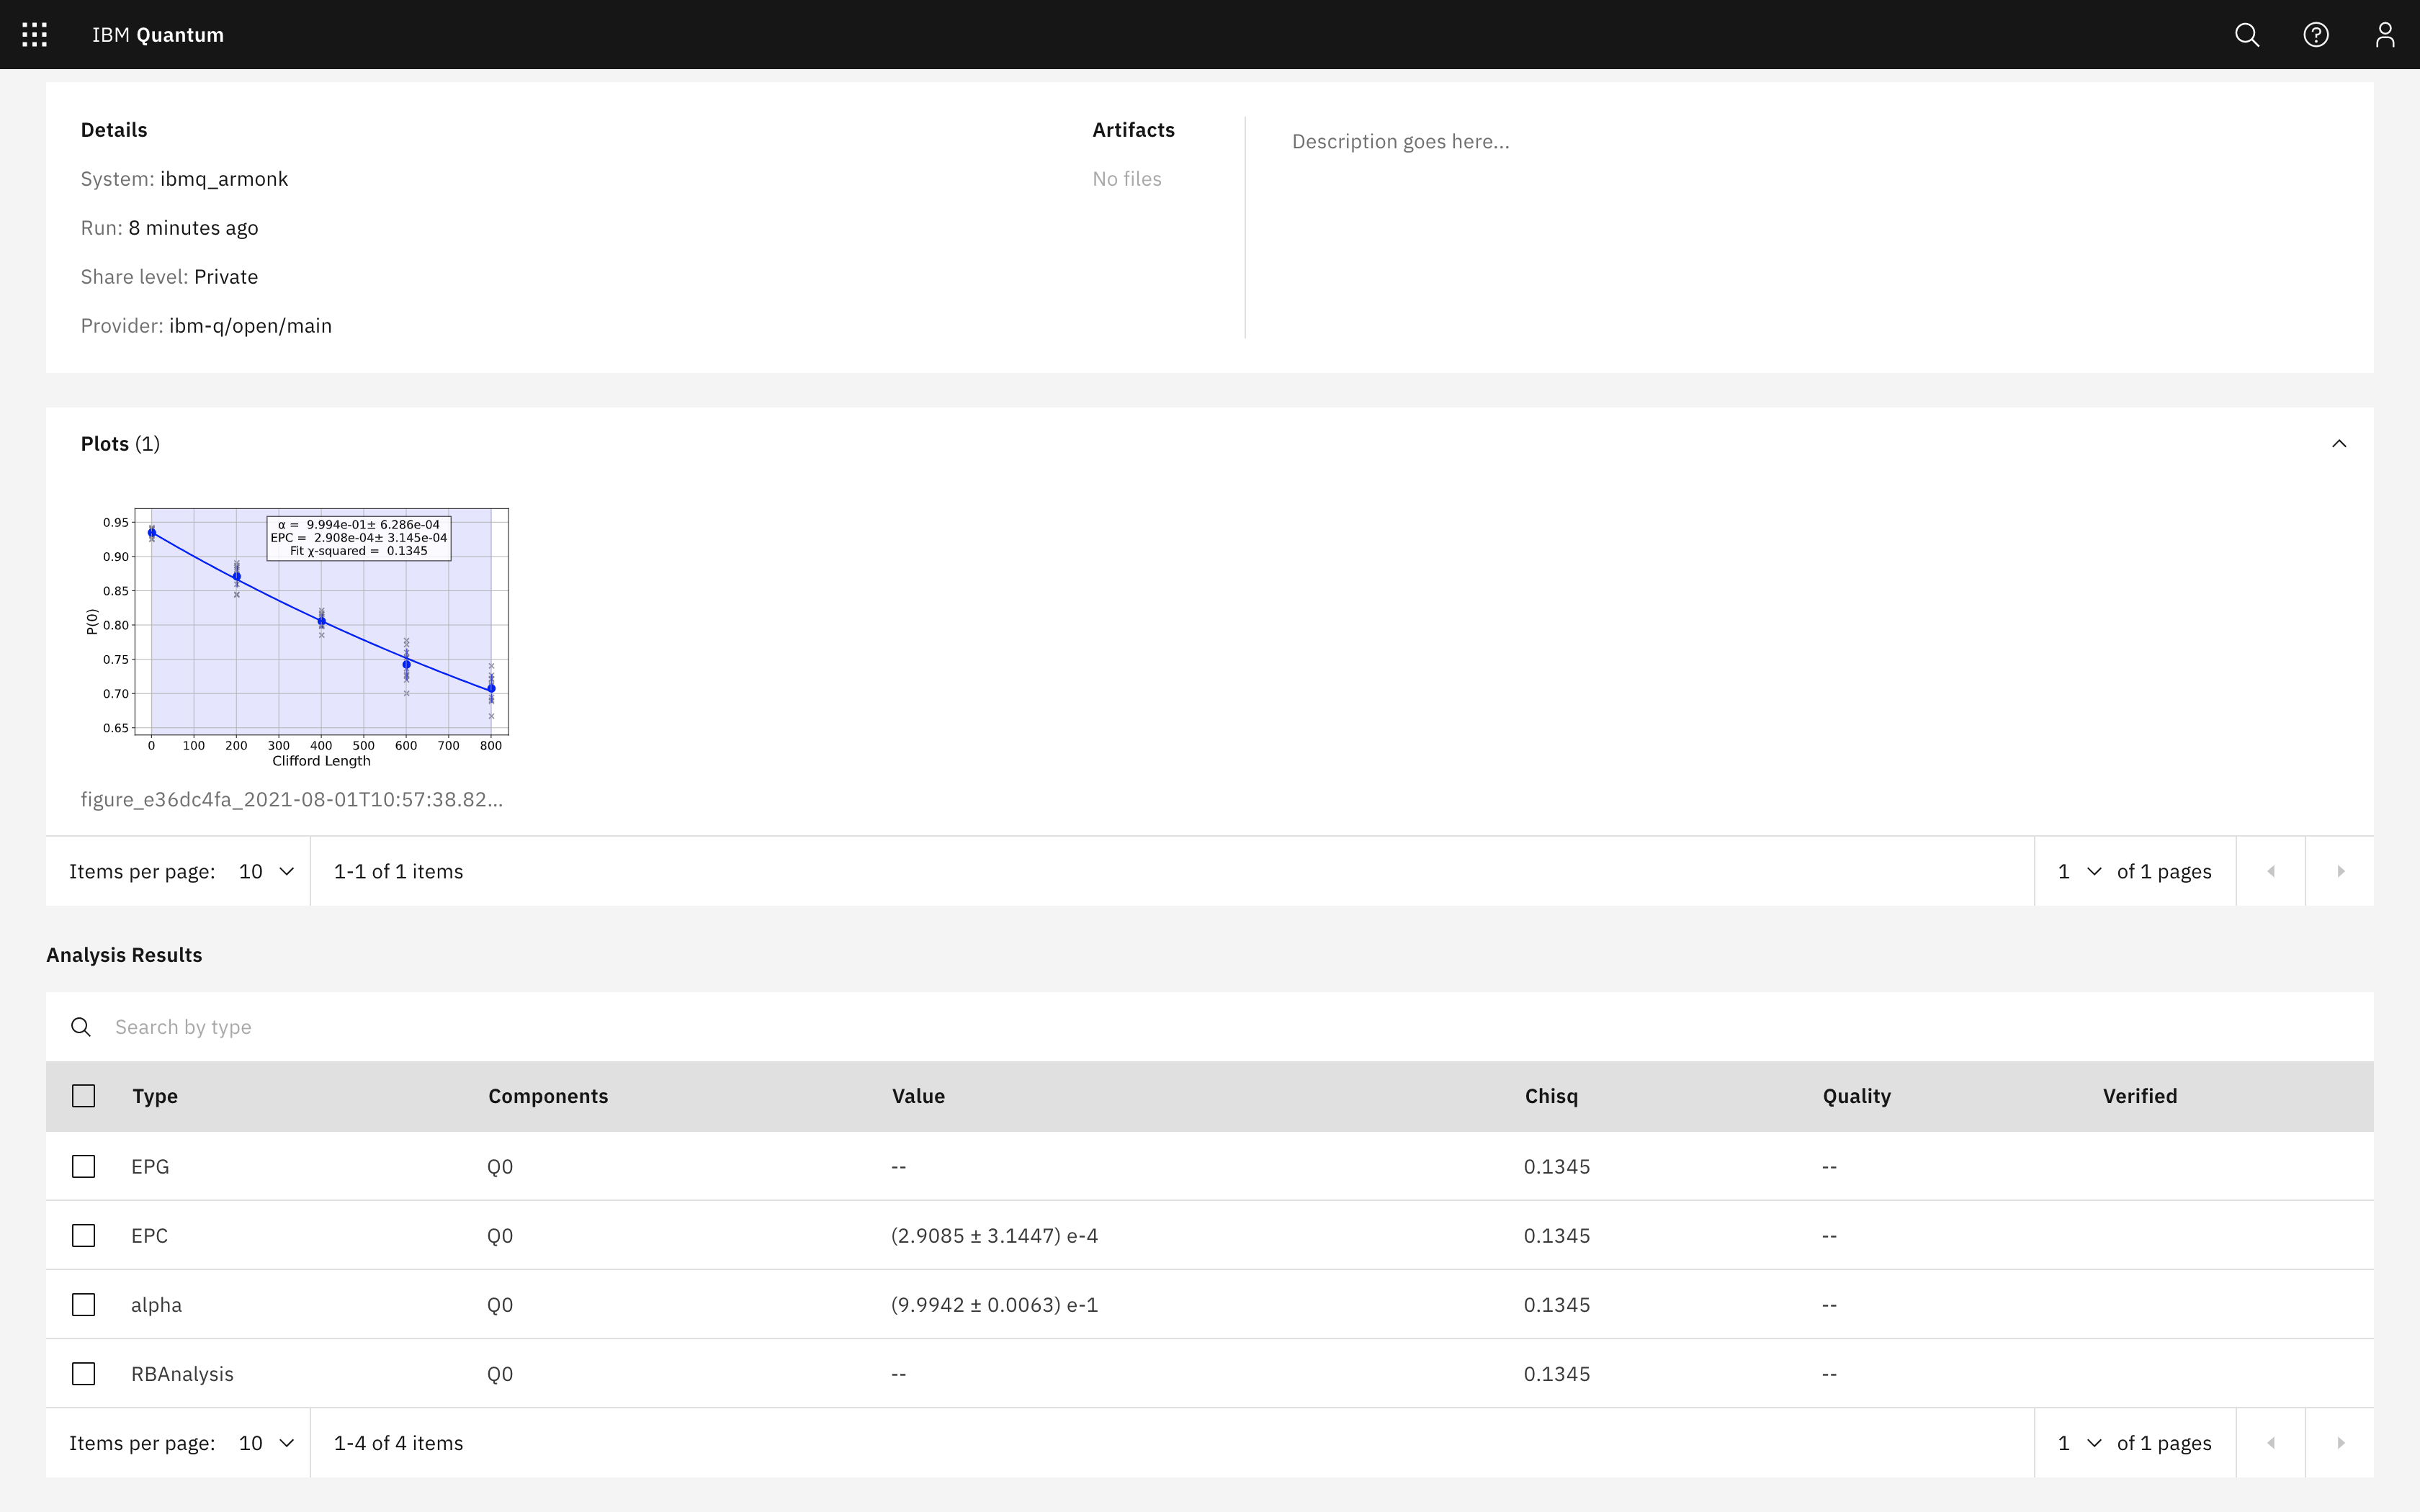

## State tomography experiment
Let's do state tomography on a Hadamard state.

In [12]:
from qiskit_experiments.library import StateTomography
import qiskit

# Construct state by applying H gate
qc_h = qiskit.QuantumCircuit(1)
qc_h.h(0)

qstexp = StateTomography(qc_h)
qst_expdata = qstexp.run(backend).block_for_results()
qst_expdata.save()

for result in qst_expdata.analysis_results():
    print(result)

You can view the experiment online at https://quantum-computing.ibm.com/experiments/14da0e00-3500-4113-9561-79077457bc3e
DbAnalysisResultV1
- name: state
- value: DensityMatrix([[0.50195313+0.j        , 0.40527344-0.00976562j],
               [0.40527344+0.00976562j, 0.49804688+0.j        ]],
              dims=(2,))
- extra: <4 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: state_fidelity
- value: 0.9052734375000002
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: positive
- value: True
- device_components: ['Q0']
- verified: False


The tomography experiment doesn't have associated figures. Similar to randomized benchmarking, the tomography matrix is not shown in the graphical interface, but the other analysis parameters are:

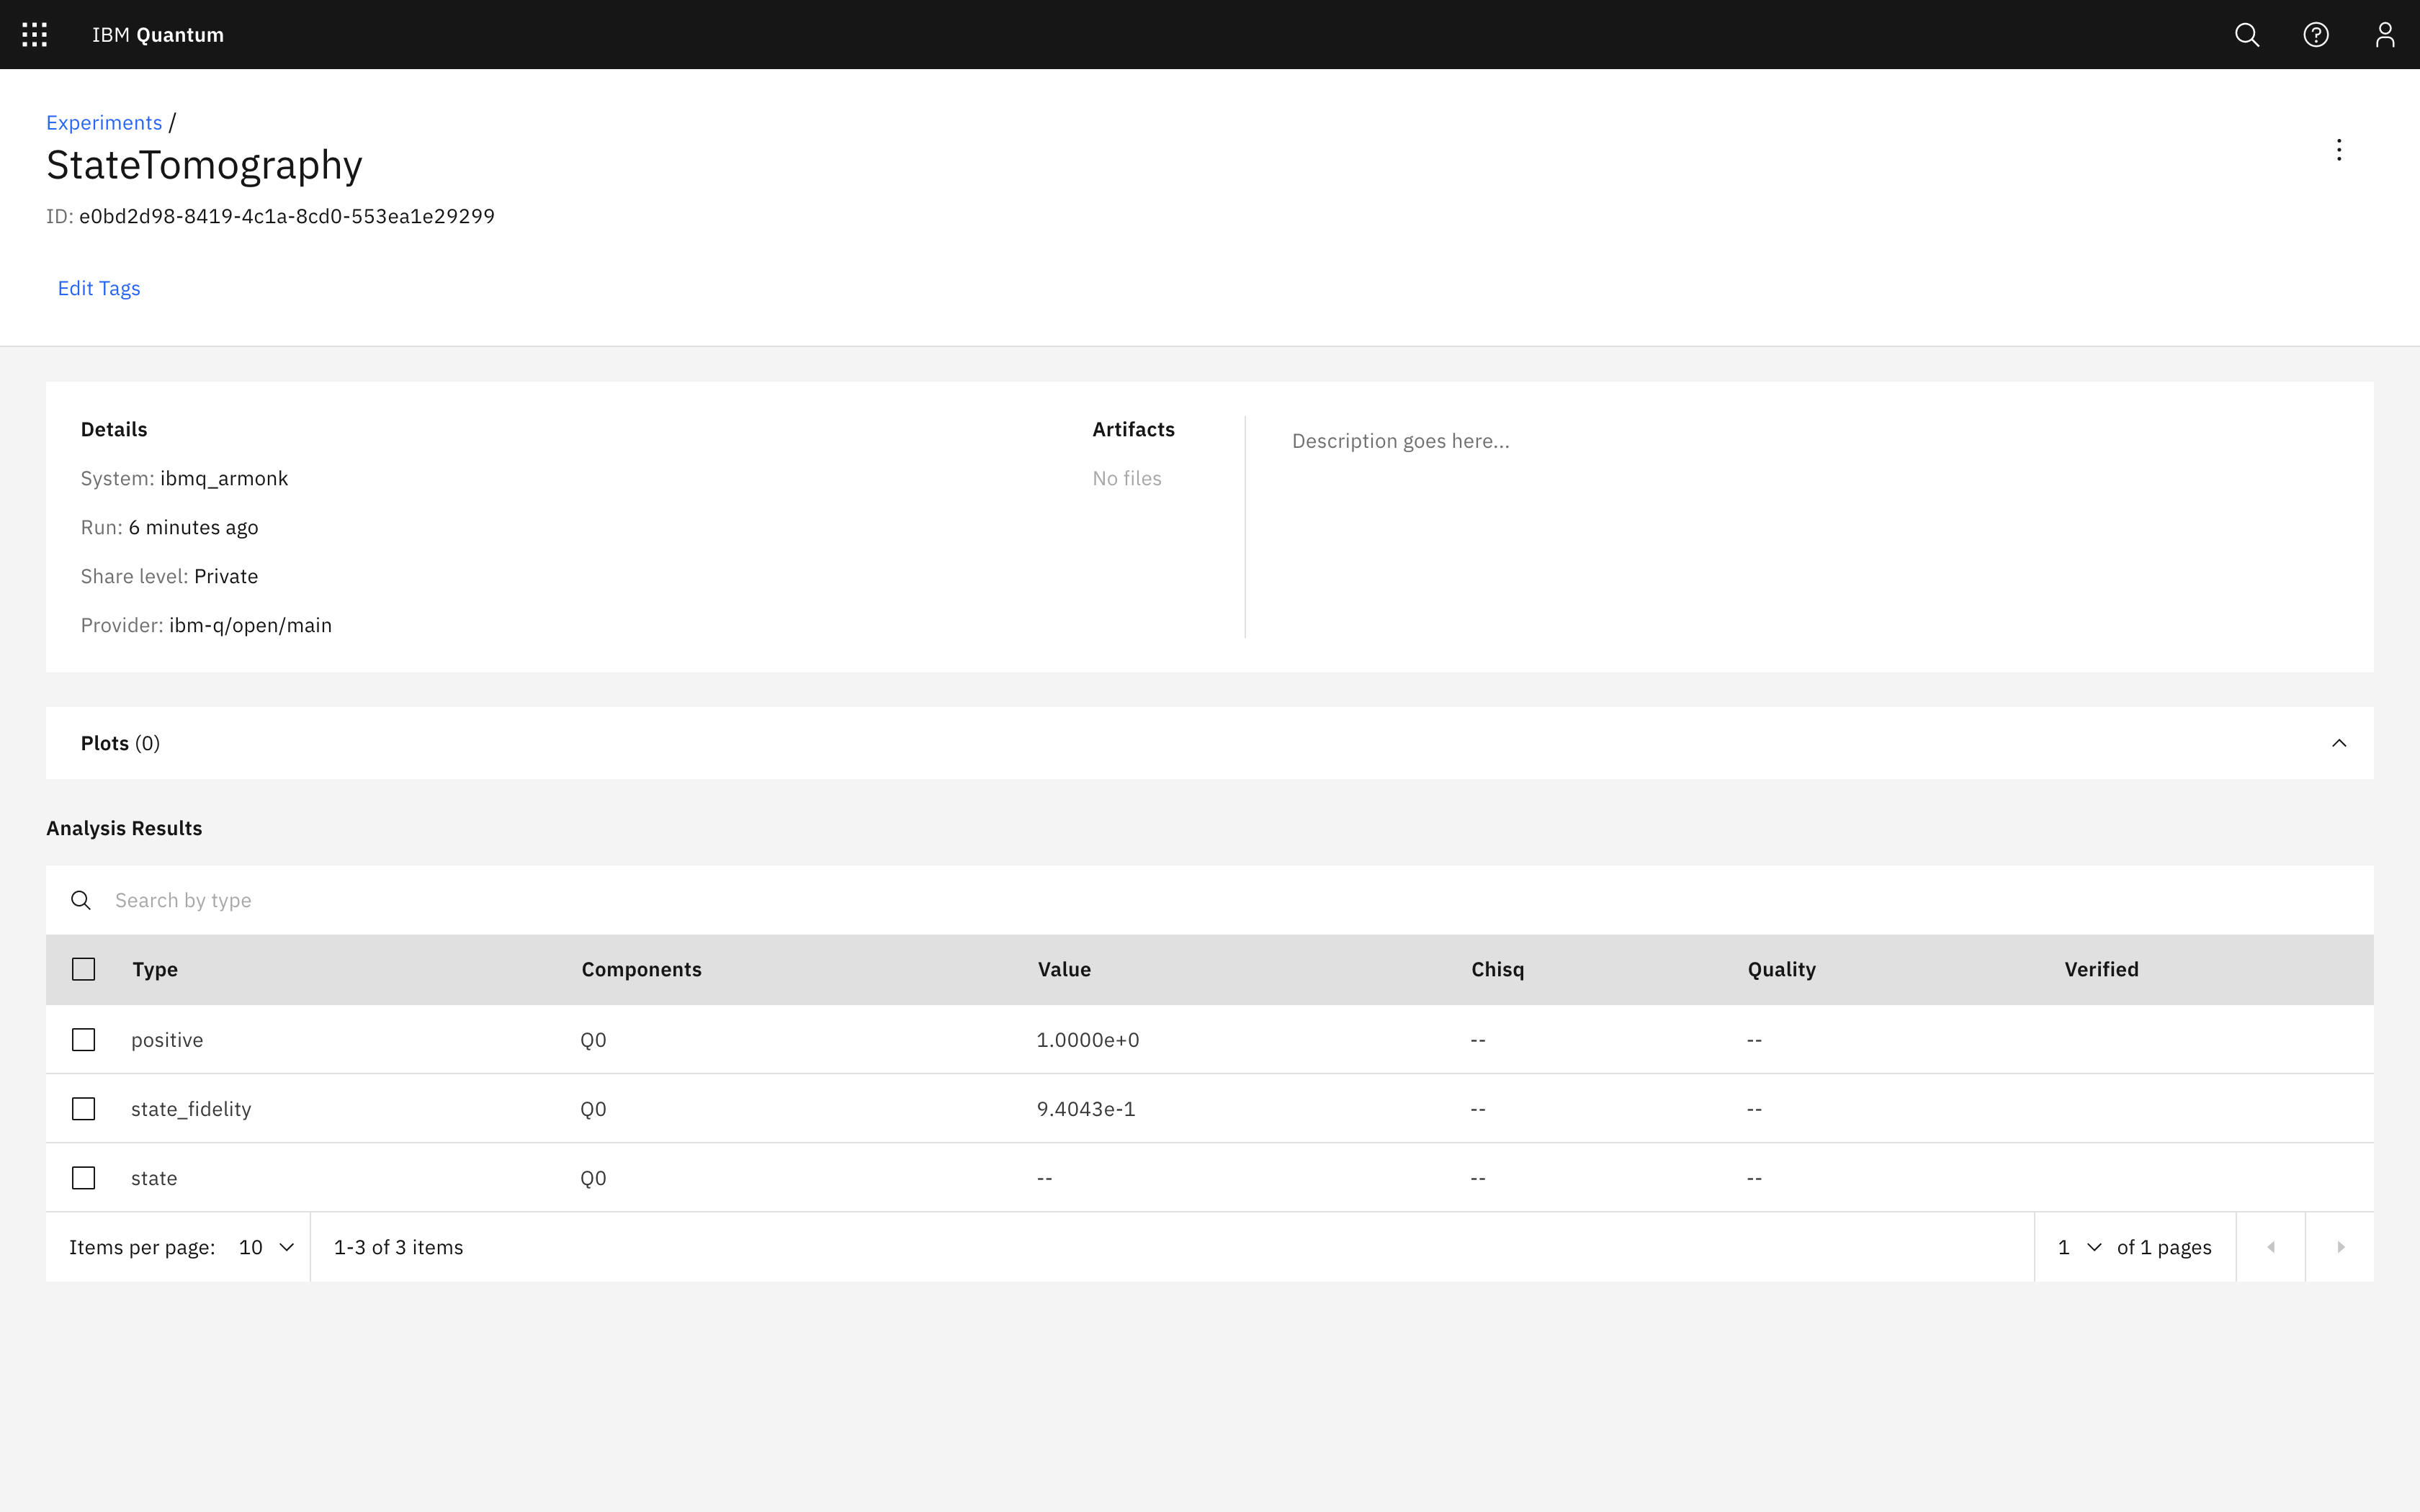

In [13]:
import qiskit.tools.jupyter
%qiskit_copyright